# **Predicting Credit Card Approvals - by AHMED**

# **Importation du données**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
data = pd.read_csv('cc_approvals.data', header=None)

# **Data Preprocessing**

## **Exploration données :**

In [96]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [98]:
data.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


## notes importents :

**Notre jeu de données contient à la fois des données numériques et non numériques (plus précisément des données de types float64, int64 et object). En particulier, les caractéristiques 2, 7, 10 et 14 contiennent des valeurs numériques (de types float64, float64, int64 et int64 respectivement) et toutes les autres caractéristiques contiennent des valeurs non numériques.**

In [99]:
data[[2,7,10,14]].dtypes

,0
2,float64
7,float64
10,int64
14,int64


**Le jeu de données contient également des valeurs provenant de plusieurs plages. Certaines caractéristiques ont une plage de valeurs de 0 à 28, d'autres de 0 à 67, et certaines de 0 à 100000. En dehors de cela, nous pouvons obtenir des informations statistiques utiles (comme la moyenne, la valeur maximale et minimale) concernant les caractéristiques qui ont des valeurs numériques.**

In [100]:
data[[2,7,10,14]].describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


**Enfin, le jeu de données présente des valeurs manquantes, que nous allons traiter dans cette tâche. Les valeurs manquantes dans le jeu de données sont étiquetées par '?', comme on peut le voir dans la sortie de la dernière cellule.**

In [101]:
data.tail(17)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [102]:
data.replace('?', np.nan, inplace=True)

## missing values

In [103]:
data.isnull().sum()

,0
0,12
1,12
2,0
3,6
4,6
5,9
6,9
7,0
8,0
9,0


In [104]:
frq = (data.isnull().sum())/len(data)
frq

,0
0,0.017391
1,0.017391
2,0.000000
3,0.008696
4,0.008696
5,0.013043
6,0.013043
7,0.000000
8,0.000000
9,0.000000


## Handle Missing Values :

**les colonnes a des valeurs monquants : 0,1,3,4,5,6,13**

les colonnes ont des valeurs numerics : 1 , 13

In [105]:
data[1] = data[1].astype('float64')
data[13] = data[13].astype('float64')

In [106]:
data[1].fillna(data[1].mean(), inplace=True)
data[13].fillna(data[13].mean(), inplace=True)

<ipython-input-106-39ad8bd11113>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[1].fillna(data[1].mean(), inplace=True)
<ipython-input-106-39ad8bd11113>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

les colonnes 0,3,4,5,6 :

In [107]:
for col in data.columns:
  if data[col].dtypes == 'object' :
    data[col].fillna(data[col].value_counts().index[0], inplace=True)

<ipython-input-107-9069b807d416>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].value_counts().index[0], inplace=True)
<ipython-input-107-9069b807d416>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [108]:
data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## **Note :**

**Avant de passer à la construction de notre modèle d'apprentissage automatique,Il reste encore quelques étapes de prétraitement mineures mais essentielles**

## **Convertir les données non numériques en données numériques**

### **Label Encoding(ordinal variables)**

In [109]:
from sklearn.preprocessing import LabelEncoder



In [110]:
label = LabelEncoder()

In [111]:
for col in data.columns:
  if data[col].dtypes == 'object':
    data[col] = label.fit_transform(data[col])


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    int64  
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       690 non-null    int64  
 4   4       690 non-null    int64  
 5   5       690 non-null    int64  
 6   6       690 non-null    int64  
 7   7       690 non-null    float64
 8   8       690 non-null    int64  
 9   9       690 non-null    int64  
 10  10      690 non-null    int64  
 11  11      690 non-null    int64  
 12  12      690 non-null    int64  
 13  13      690 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


## **Mise à l'échelle des caractéristiques :**

MinMaxScaler : Cette méthode met à l'échelle les données dans une plage spécifique, généralement entre 0 et 1. Elle est utile lorsque vous voulez que toutes les valeurs soient dans un intervalle fixe, ce qui peut être important pour des modèles sensibles à l'échelle des données, comme les réseaux de neurones.

In [113]:
from sklearn.preprocessing import MinMaxScaler


In [114]:
scaler = MinMaxScaler()


In [115]:
for col in data.columns:
  if data[col].dtypes == 'float64' or data[col].dtypes == 'int64':
    data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))


## **Feature Selection (Sélection de caractéristiques) :**

La sélection des caractéristiques consiste à analyser la corrélation entre les caractéristiques et la variable cible pour éliminer les caractéristiques redondantes ou non pertinentes. Cela permet de réduire la complexité du modèle, d'éviter le surapprentissage et d'améliorer les performances en réduisant le bruit dans les données.

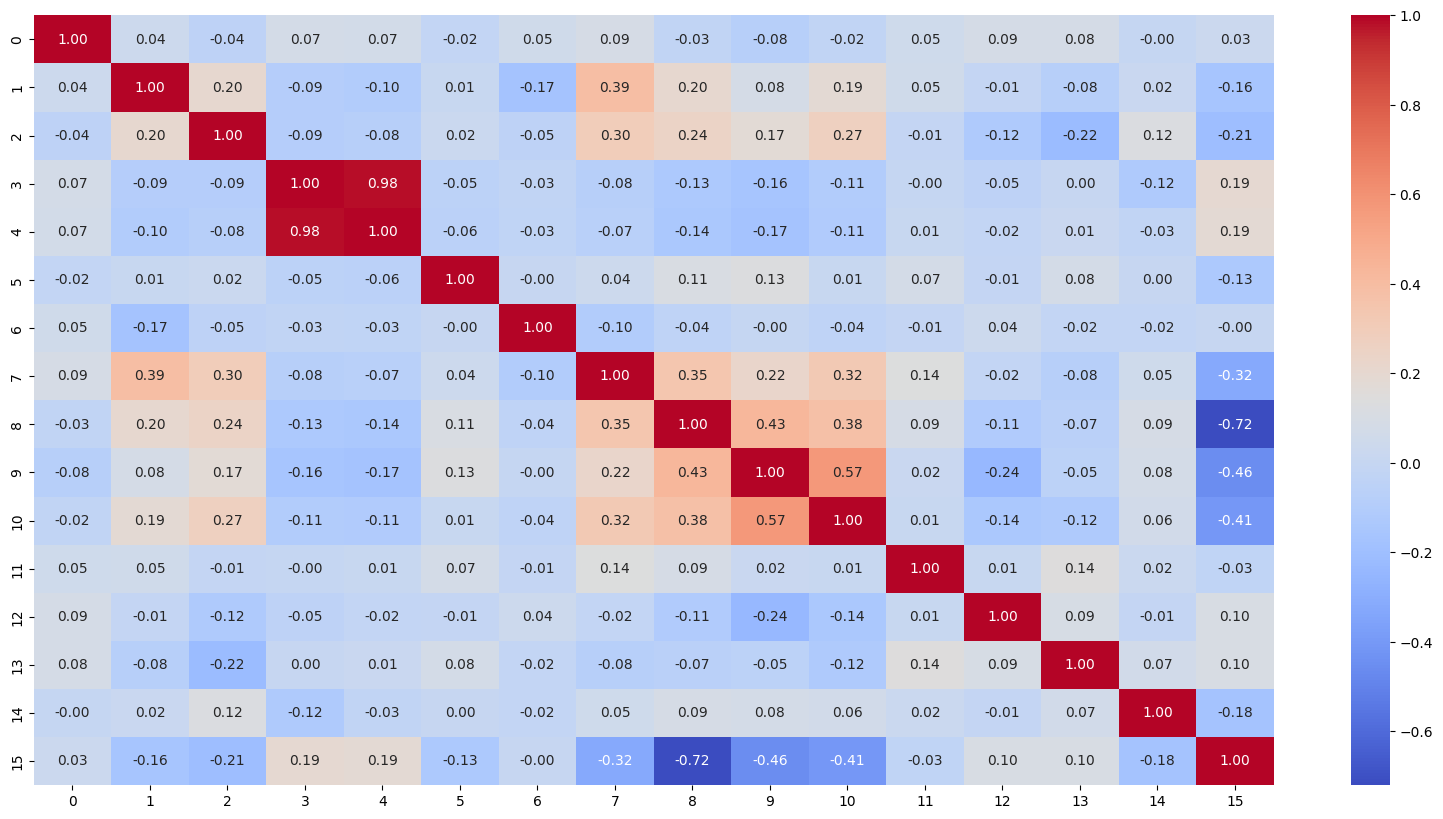

In [116]:

corr_matrix = data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()


# **Construction du Modèle**

## Diviser les Données :

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
data = data.drop([11, 13], axis=1)
data = data.values

In [119]:
X = data[:,0:12]
y = data[:,13]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## **Entraîner le Modèle**

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
notremodel = LogisticRegression()

In [123]:
notremodel.fit(X_train, y_train)

LogisticRegression()

## **Évaluation du Modèle**

**Matrice de Confusion**

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
y_pred = notremodel.predict(X_test)

In [126]:
confusion_matrix(y_test, y_pred)

array([[94,  9],
       [27, 98]])

<Axes: >

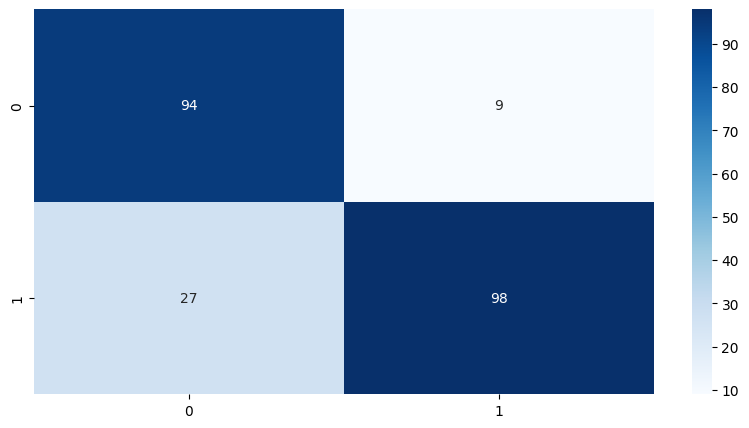

In [127]:
matrice = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
ax = plt.subplot()
sns.heatmap(matrice, annot=True, ax = ax, cmap='Blues')

Pour la matrice de confusion, le premier élément de la première ligne de la matrice de confusion représente les vrais négatifs, c'est-à-dire le nombre d'instances négatives (demandes refusées) correctement prédites par le modèle. Et le dernier élément de la deuxième ligne de la matrice de confusion représente les vrais positifs, c'est-à-dire le nombre d'instances positives (demandes approuvées) correctement prédites par le modèle.

Précision : Mesurez le pourcentage de prédictions correctes.

In [128]:
print("Accuracy of logistic regression classifier: ", np.around(notremodel.score(X_test, y_test)*100,2) ,'%')

Accuracy of logistic regression classifier:  84.21 %
